# CSE 8000 Course Project

## Importing Libraries

In [1]:
# Importing Libraries



# Basic Libraries #################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import datetime
import time


# For Feature Engineering #########################################################################################

# For Plotting Correlation Matrix and Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Label Encoder
from sklearn.preprocessing import LabelEncoder


# For Machine Learning Techniques #################################################################################

# For Data Anaylsis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# For Grid Search
from sklearn.model_selection import GridSearchCV

# For Metrics
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_percentage_error

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

# For SVM
from sklearn import svm
from sklearn.svm import SVC

# For Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# For KNN
from sklearn.neighbors import KNeighborsClassifier

# For Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score



# Personal Preference #############################################################################################
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Select Dataset File and Target Variable


dataset_file = "base_def.csv"

target_variable = 'Win'

## Preliminary Data Analysis

In [3]:
# Uploading dataset as a Pandas file


df_pd = pd.read_csv(dataset_file)
df_pd.head(30)

,Unnamed: 0,Champ,Team,GoldEarned,Kills,Deaths,Assists,Win,totalDamageDealtToChampions,damageDealtToTurrets,...,totalMinionsKilled,champLevel,wardsPlaced,firstBloodKill,firstBloodAssist,WRgeneral,WRchamp,Duration_secs,Position,Role
0,1,Garen,100,10913,3,13,6,False,14015,0,...,205,16,10,False,False,0.6000,0.5556,2157,TOP,SOLO
1,2,Irelia,100,11004,10,3,3,True,13895,6226,...,162,13,6,False,False,0.8000,0.8824,1216,MIDDLE,SOLO
2,3,Kayn,100,13191,10,8,15,True,29583,2259,...,33,16,3,False,False,0.5667,0.8333,1949,JUNGLE,NONE
3,4,Tristana,100,7025,2,6,3,False,11439,793,...,138,10,8,False,False,0.4000,0.0000,1449,BOTTOM,DUO_CARRY
4,5,Jhin,200,10867,4,4,8,True,13623,800,...,158,13,9,False,False,0.4667,1.0000,1675,BOTTOM,DUO_CARRY
5,6,Sion,200,13949,6,7,8,True,34755,10821,...,255,18,17,False,False,0.6333,1.0000,2071,TOP,SOLO
6,7,Zoe,100,11485,9,2,10,True,18840,2849,...,167,15,12,True,False,0.6333,1.0000,1560,MIDDLE,SOLO
7,8,Azir,100,6600,2,2,4,True,7118,1179,...,119,11,7,False,False,0.6667,0.7600,1087,NONE,DUO_SUPPORT
8,9,Jayce,200,9116,2,7,0,False,10936,695,...,198,14,8,False,False,0.5333,0.5714,1633,TOP,SOLO
9,10,Heimerdinger,200,11640,5,6,6,False,23732,1048,...,223,15,11,False,False,0.4667,0.5000,1584,MIDDLE,SOLO


In [4]:
# Basic Analysis


pd.DataFrame(df_pd.describe())

,Unnamed: 0,Team,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,turretKills,inhibitorKills,totalMinionsKilled,champLevel,wardsPlaced,WRgeneral,WRchamp,Duration_secs
count,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000,23752.000000
mean,12613.528713,149.991580,10223.871842,5.011578,4.965013,7.434153,15166.688153,2685.086603,27.511325,20085.445731,1.025556,0.149208,116.818584,13.457225,11.904598,0.517737,0.511403,1601.516209
std,7437.001027,50.001052,3479.974767,3.977473,2.859207,5.375720,9393.446143,2965.702247,19.051542,10096.737207,1.286559,0.406424,81.441117,2.674443,9.636245,0.096884,0.293077,389.092262
min,1.000000,100.000000,666.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,191.000000
25%,6144.750000,100.000000,7764.000000,2.000000,3.000000,3.000000,8268.000000,526.000000,15.000000,12932.750000,0.000000,0.000000,32.000000,12.000000,6.000000,0.466700,0.333300,1349.000000
50%,12540.000000,100.000000,9953.000000,4.000000,5.000000,6.000000,13312.500000,1798.000000,22.000000,18599.000000,1.000000,0.000000,130.000000,14.000000,9.000000,0.533300,0.500000,1596.000000
75%,19028.250000,200.000000,12479.250000,7.000000,7.000000,10.000000,20052.000000,3881.000000,34.000000,25653.250000,2.000000,0.000000,183.000000,15.000000,13.000000,0.566700,0.666700,1852.000000
max,25647.000000,200.000000,25133.000000,29.000000,20.000000,40.000000,91579.000000,52378.000000,153.000000,122378.000000,9.000000,4.000000,427.000000,18.000000,92.000000,1.000000,1.000000,3424.000000


In [5]:
# Data Types


pd.DataFrame(df_pd.dtypes, columns = ['Data Types'])

,Data Types
Unnamed: 0,int64
Champ,object
Team,int64
GoldEarned,int64
Kills,int64
Deaths,int64
Assists,int64
Win,bool
totalDamageDealtToChampions,int64
damageDealtToTurrets,int64


In [6]:
# Size of Dataset


df_pd.shape

(23752, 24)

In [7]:
# Cardinality


card = df_pd.apply(pd.Series.nunique)
pd.DataFrame(card, columns = ['Cardinality'])

,Cardinality
Unnamed: 0,23752
Champ,148
Team,2
GoldEarned,10602
Kills,29
Deaths,20
Assists,39
Win,2
totalDamageDealtToChampions,15129
damageDealtToTurrets,7304


In [8]:
# Missing Values


sum_missing = df_pd.isna().sum()
pct_missing = df_pd.isna().mean()

missing_values = pd.concat([sum_missing, pct_missing], axis = 1)
missing_values = missing_values.reset_index(drop = False)
missing_values = missing_values.rename(columns = {0: 'Number of Missing Values',
                                                  1: 'Missing Percentage'})
missing_values

,index,Number of Missing Values,Missing Percentage
0,Unnamed: 0,0,0.0
1,Champ,0,0.0
2,Team,0,0.0
3,GoldEarned,0,0.0
4,Kills,0,0.0
5,Deaths,0,0.0
6,Assists,0,0.0
7,Win,0,0.0
8,totalDamageDealtToChampions,0,0.0
9,damageDealtToTurrets,0,0.0


## Feature Engineering

In [9]:
# Removing Columns containing too many Missing Values


df_pd2 = df_pd

th = .10
# Defining threshold for cutoff percentage

bad_column = []
for i,r in missing_values.iterrows():
        c = r['index']
        mp = r["Missing Percentage"]
        if mp > th:
            bad_column.append(c)

for i in bad_column:
    for j in df_pd2.columns:
        if j == i:
            df_pd2 = df_pd2.drop(j, axis = 1)
            
print(len(df_pd2.columns))
pd.DataFrame(df_pd2.columns)

24


,0
0,Unnamed: 0
1,Champ
2,Team
3,GoldEarned
4,Kills
5,Deaths
6,Assists
7,Win
8,totalDamageDealtToChampions
9,damageDealtToTurrets


In [10]:
# One Hot Enconding


df_pd3 = pd.get_dummies(df_pd2, drop_first = True, columns = ['Team','Position','Win'])
df_pd3.head()

,Unnamed: 0,Champ,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,...,WRgeneral,WRchamp,Duration_secs,Role,Team_200,Position_JUNGLE,Position_MIDDLE,Position_NONE,Position_TOP,Win_True
0,1,Garen,10913,3,13,6,14015,0,24,38262,...,0.6000,0.5556,2157,SOLO,0,0,0,0,1,0
1,2,Irelia,11004,10,3,3,13895,6226,10,14749,...,0.8000,0.8824,1216,SOLO,0,0,1,0,0,1
2,3,Kayn,13191,10,8,15,29583,2259,18,48254,...,0.5667,0.8333,1949,NONE,0,1,0,0,0,1
3,4,Tristana,7025,2,6,3,11439,793,21,15039,...,0.4000,0.0000,1449,DUO_CARRY,0,0,0,0,0,0
4,5,Jhin,10867,4,4,8,13623,800,12,11402,...,0.4667,1.0000,1675,DUO_CARRY,1,0,0,0,0,1


In [11]:
# Manually Changing Variables 


# Adding Gold Earned per Minute Variable
df_pd3['Gold_Earned_per_Minute'] = df_pd3.GoldEarned//(df_pd3.Duration_secs//60)

# Dropping the Unamed Variable since it is equalivant to the index
df_pd3 = df_pd3.drop(['Unnamed: 0'], axis = 1)

# Renaming Columns
df_pd3 = df_pd3.rename(columns={"Team_200": "Team 2", "Position_JUNGLE": "Jungle", 
                                "Position_MIDDLE": "Mid", "Position_NONE": "Support", 
                                "Position_TOP": "Top","Win_True": "Win"})

df_pd3.head()

,Champ,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,turretKills,...,WRchamp,Duration_secs,Role,Team 2,Jungle,Mid,Support,Top,Win,Gold_Earned_per_Minute
0,Garen,10913,3,13,6,14015,0,24,38262,0,...,0.5556,2157,SOLO,0,0,0,0,1,0,311
1,Irelia,11004,10,3,3,13895,6226,10,14749,3,...,0.8824,1216,SOLO,0,0,1,0,0,1,550
2,Kayn,13191,10,8,15,29583,2259,18,48254,0,...,0.8333,1949,NONE,0,1,0,0,0,1,412
3,Tristana,7025,2,6,3,11439,793,21,15039,0,...,0.0000,1449,DUO_CARRY,0,0,0,0,0,0,292
4,Jhin,10867,4,4,8,13623,800,12,11402,0,...,1.0000,1675,DUO_CARRY,1,0,0,0,0,1,402


In [12]:
# String Indexer


df_SI = df_pd3

cat_columns = df_SI.select_dtypes(['object'])
cat_columns

#Convert from object type to cat. type
for i in cat_columns:
    df_SI[i] = df_SI[i].astype('category')

# Convert to Encoded values
cat_columns = df_SI.select_dtypes(['category'])
LE = LabelEncoder()
for i in cat_columns:
    df_SI[i] = LE.fit_transform(df_SI[i])
    
df_pd4 = df_SI
df_pd4

,Champ,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,turretKills,...,WRchamp,Duration_secs,Role,Team 2,Jungle,Mid,Support,Top,Win,Gold_Earned_per_Minute
0,33,10913,3,13,6,14015,0,24,38262,0,...,0.5556,2157,4,0,0,0,0,1,0,311
1,40,11004,10,3,3,13895,6226,10,14749,3,...,0.8824,1216,4,0,0,1,0,0,1,550
2,55,13191,10,8,15,29583,2259,18,48254,0,...,0.8333,1949,3,0,1,0,0,0,1,412
3,120,7025,2,6,3,11439,793,21,15039,0,...,0.0000,1449,1,0,0,0,0,0,0,292
4,46,10867,4,4,8,13623,800,12,11402,0,...,1.0000,1675,1,1,0,0,0,0,1,402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23747,100,3770,2,6,2,3526,804,7,7750,0,...,0.5000,997,2,0,0,0,1,0,0,235
23748,49,10314,6,3,6,14162,2617,35,14083,3,...,0.5000,1357,1,1,0,0,0,0,1,468
23749,31,12067,8,0,11,13767,5288,20,15809,0,...,1.0000,1433,4,1,0,1,0,0,1,524
23750,11,9815,5,0,19,11807,3559,45,10737,1,...,0.6667,1525,1,1,0,0,0,0,1,392


In [75]:
# Filling in Missing Values


df_pd5 = df_pd4.fillna(df_pd3.median())

#df_pd3.mean()
df_pd5.head(10)

,Champ,GoldEarned,Kills,Deaths,Assists,totalDamageDealtToChampions,damageDealtToTurrets,visionScore,totalDamageTaken,turretKills,...,WRchamp,Duration_secs,Role,Team 2,Jungle,Mid,Support,Top,Win,Gold_Earned_per_Minute
0,33,10913,3,13,6,14015,0,24,38262,0,...,0.5556,2157,4,0,0,0,0,1,0,311
1,40,11004,10,3,3,13895,6226,10,14749,3,...,0.8824,1216,4,0,0,1,0,0,1,550
2,55,13191,10,8,15,29583,2259,18,48254,0,...,0.8333,1949,3,0,1,0,0,0,1,412
3,120,7025,2,6,3,11439,793,21,15039,0,...,0.0000,1449,1,0,0,0,0,0,0,292
4,46,10867,4,4,8,13623,800,12,11402,0,...,1.0000,1675,1,1,0,0,0,0,1,402
5,106,13949,6,7,8,34755,10821,39,47226,5,...,1.0000,2071,4,1,0,0,0,1,1,410
6,146,11485,9,2,10,18840,2849,24,18754,1,...,1.0000,1560,4,0,0,1,0,0,1,441
7,10,6600,2,2,4,7118,1179,9,7520,1,...,0.7600,1087,2,0,0,0,1,0,1,366
8,45,9116,2,7,0,10936,695,17,17996,0,...,0.5714,1633,4,1,0,0,0,1,0,337
9,38,11640,5,6,6,23732,1048,22,16038,0,...,0.5000,1584,4,1,0,1,0,0,0,447


## Data Visualization

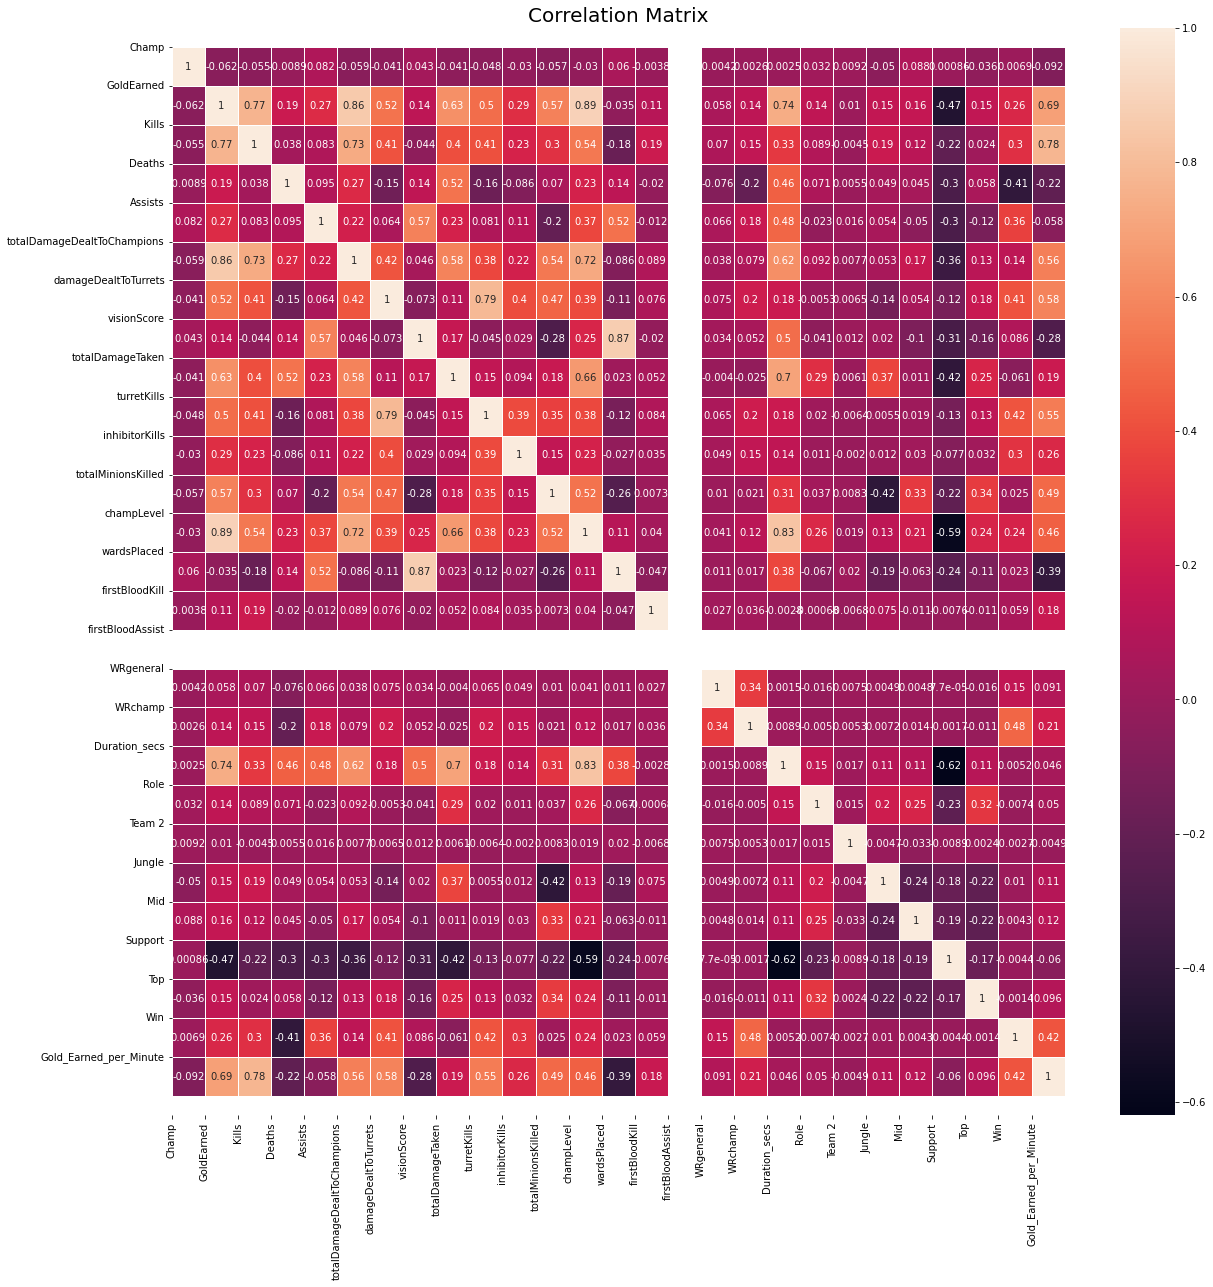

In [14]:
# Heat Map


fr_hm = df_pd5 #For Heat Map

## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = fr_hm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Plotting heat map
g=sns.heatmap(fr_hm[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
plt.xticks(range(len(fr_hm.columns)), fr_hm.columns, rotation=90)
plt.yticks(range(len(fr_hm.columns)), fr_hm.columns)
plt.gca().xaxis.tick_bottom()
plt.show()

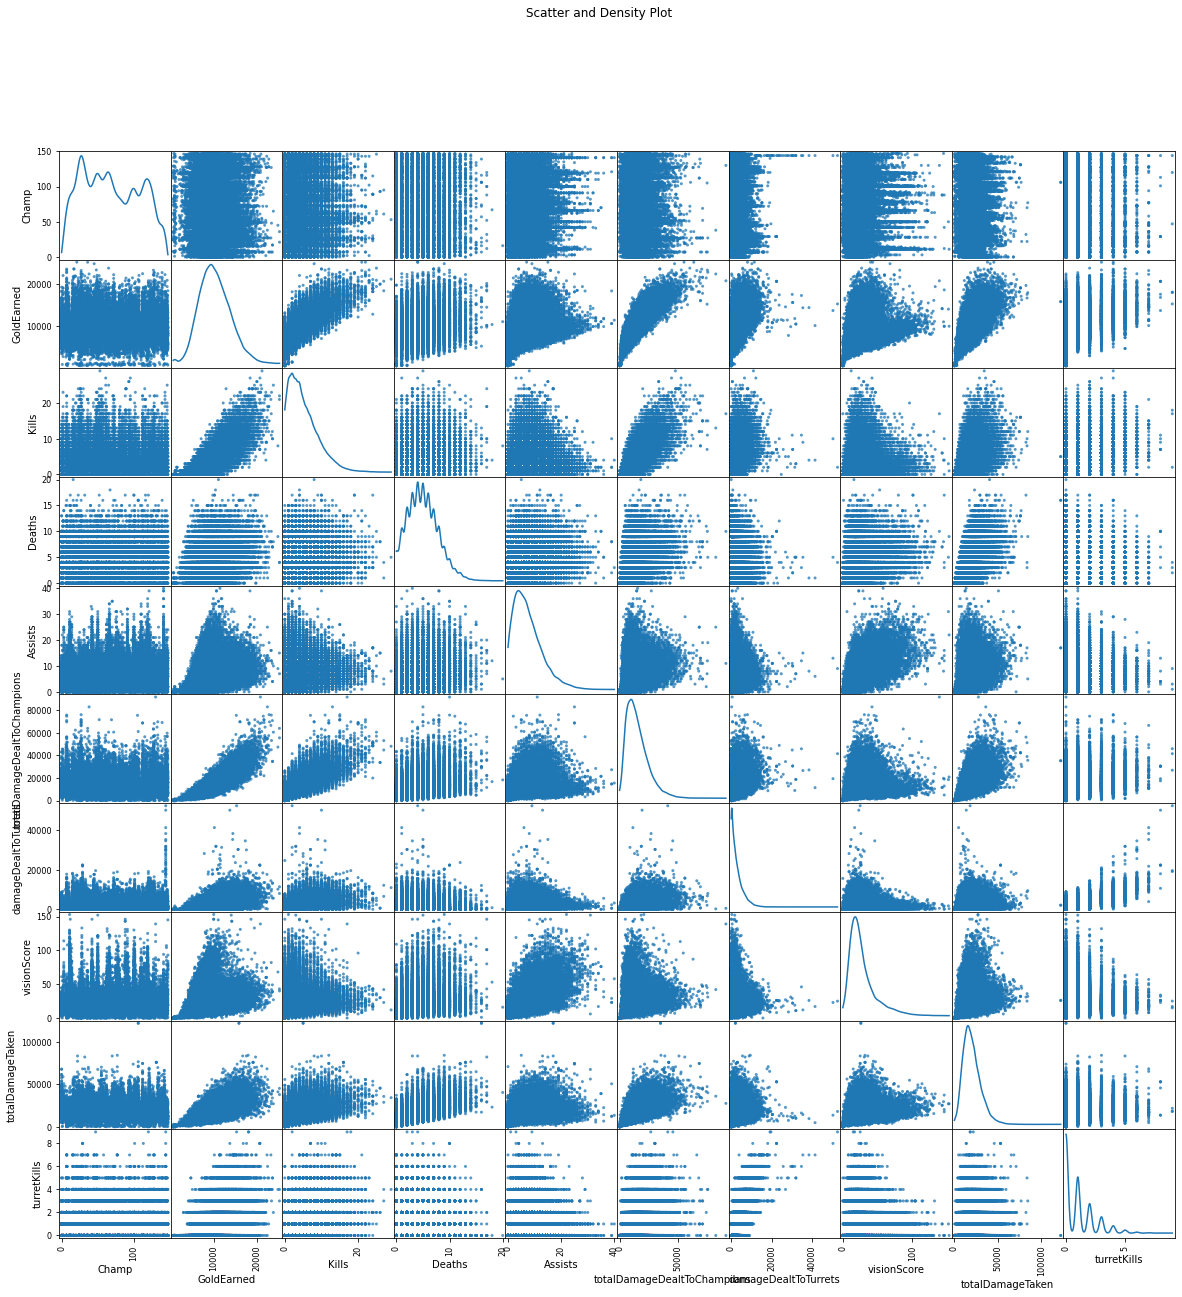

In [15]:
# Scatter Plot of Data


scatterplot_df = df_pd5

def plotScatterMatrix(scatterplot_df, plotSize, textSize):
    df = scatterplot_df.select_dtypes(include =[np.number]) 
    
    df = scatterplot_df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize],
                                    diagonal='kde')
    corrs = df.corr().values
    #for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        #ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], 
        #(0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    


plotScatterMatrix(scatterplot_df, 20, 10)

## Machine Learning Techniques

### Splitting the Data

In [94]:
# Setting the pre-proccessed dataframe


df_datasplit = df_pd5

X = df_datasplit[df_datasplit.columns[~df_datasplit.columns.isin([target_variable])]]
y = df_datasplit[target_variable].to_frame()

#Scaling X Values
Scaler = MinMaxScaler()
X_Scaled = pd.DataFrame(Scaler.fit_transform(X),columns = X.columns).set_index(X.index)

X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2, 
                                                 random_state = 123)

In [20]:
# Creating Results List


Train_score = []
Test_score = []

r2 = []
PCT_ME = []

### Random Forest

In [21]:
# Running Random Forest


start_time = time.time()

params_RF = {'n_estimators': [10,25,50,75,100], 'max_depth': [5,10,25,40], 
             "max_features": ['auto', 'sqrt', 'log2']}

# Running Model
RFClassifier = GridSearchCV(RandomForestClassifier(random_state=0), params_RF)
RFClassifier.fit(X_train,y_train)
print(f'Best Scores: {RFClassifier.best_score_}')
print(f'Best Parameters: {RFClassifier.best_params_}')

# Predicting
y_pred_RF = RFClassifier.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

Best Scores: 0.8991104556972542
Best Parameters: {'max_depth': 40, 'max_features': 'log2', 'n_estimators': 100}
Run Time: 222.07547616958618


In [22]:
# Results for Random Forest Classifier

r2_RF = r2_score(y_test,y_pred_RF) 
r2.append(r2_RF)

E1 = round(mean_absolute_percentage_error(y_test,y_pred_RF),4)
PCT_ME.append(E1)

Train_Score_RF = RFClassifier.score(X_train,y_train)*100
Train_score.append(Train_Score_RF)
print("Trainning Score is {}".format(Train_Score_RF))

Test_Score_RF = RFClassifier.score(X_test,y_test)*100
Test_score.append(Test_Score_RF)
print("Testing Score is {}".format(Test_Score_RF))

Trainning Score is 99.994737119099
Testing Score is 90.10734582193223


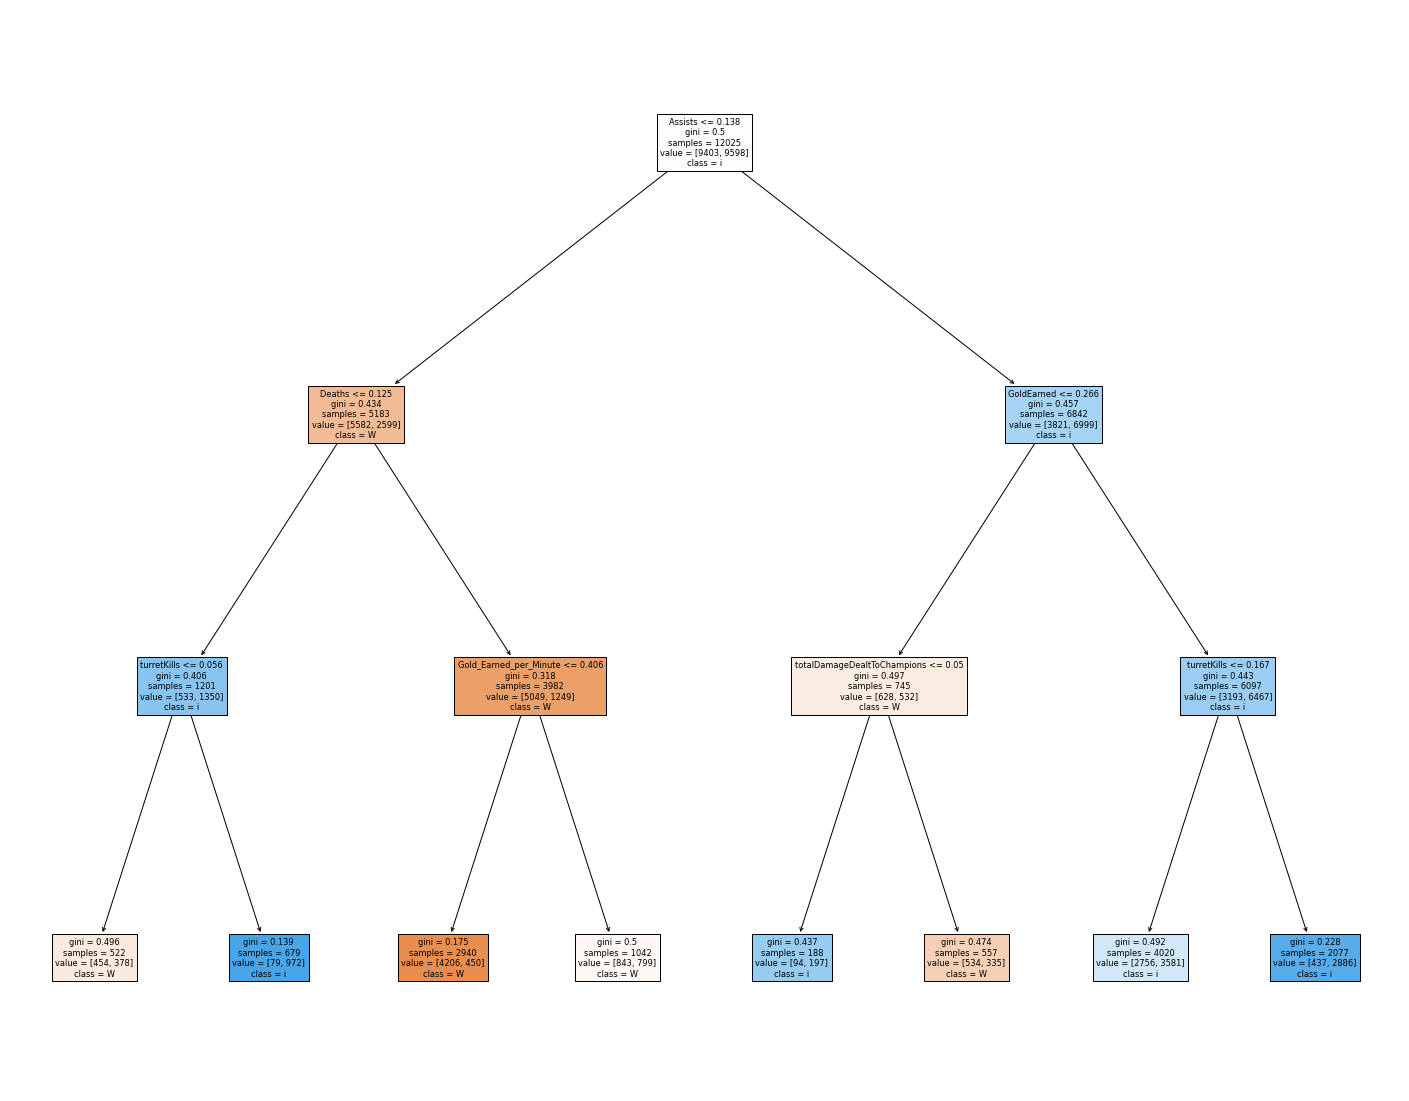

In [113]:
import matplotlib.pyplot as plt
from sklearn import tree


RFC = RandomForestClassifier(random_state=0, n_estimators = 100, max_depth = 40, 
                             max_features = 'log2')
RFC.fit(X_train,y_train)

fn = X.columns.to_numpy()
cn = df_pd5.columns.values[25]

fig = plt.figure(figsize = (25,20))
tree.plot_tree(RFC.estimators_[3],feature_names = fn, class_names=cn, filled = True);
fig.savefig('rf_individualtree.png')

'Win'

### Naive Bayes Classifier

In [24]:
# Running Gaussian Naive Bayes Classifier


start_time = time.time()

params_GNB = {}

# Running Model
gnb = GridSearchCV(GaussianNB(),params_GNB)
gnb.fit(X_train,y_train)
print(f'Best Scores: {gnb.best_score_}')
print(f'Best Parameters: {gnb.best_params_}')

# Predicting
y_pred_GNB = gnb.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

Best Scores: 0.7778531272933715
Best Parameters: {}
Run Time: 0.06080937385559082


In [25]:
# Results

r2_GNB = r2_score(y_test,y_pred_GNB) 
r2.append(r2_GNB)

E2 = round(mean_absolute_percentage_error(y_test,y_pred_GNB),4)
PCT_ME.append(E2)

Train_Score_GNB = gnb.score(X_train,y_train)*100
Train_score.append(Train_Score_GNB)
print("Trainning Score is {}".format(Train_Score_GNB))

Test_Score_GNB = gnb.score(X_test,y_test)*100
Test_score.append(Test_Score_GNB)
print("Testing Score is {}".format(Test_Score_GNB))

Trainning Score is 77.78537971685701
Testing Score is 79.18332982529994


### Support Vector Machine

In [26]:
# Running SVM


start_time = time.time()

params_SVM = {'kernel':['linear', 'rbf', 'sigmoid'], 'C':[.25,1,2]}

# Sigmoid was selected  due to the Binary Output
svmachine = GridSearchCV(SVC(), params_SVM)#sigmoid, poly, rbf, ... 
svmachine.fit(X_train, y_train)
print(f'Best Scores: {svmachine.best_score_}')
print(f'Best Parameters: {svmachine.best_params_}')

# Predicting
y_pred_SVM = svmachine.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

Best Scores: 0.8931635857599801
Best Parameters: {'C': 2, 'kernel': 'rbf'}
Run Time: 248.562846660614


In [27]:
# Results for SVM

r2_SVM = r2_score(y_test,y_pred_SVM) 
r2.append(r2_SVM)

E3 = round(mean_absolute_percentage_error(y_test,y_pred_SVM),4)
PCT_ME.append(E3)

Train_Score_SVM = svmachine.score(X_train,y_train)*100
Train_score.append(Train_Score_SVM)
print("Trainning Score is {}".format(Train_Score_SVM))

Test_Score_SVM = svmachine.score(X_test,y_test)*100
Test_score.append(Test_Score_SVM)
print("Testing Score is {}".format(Test_Score_SVM))

Trainning Score is 90.34261354665544
Testing Score is 89.85476741738582


In [134]:
SVC(kernel='rbf', C= 2)
svmachine.fit(X_train, y_train)

support_vector_indices = svmachine.support_
print(support_vector_indices)

AttributeError: 'GridSearchCV' object has no attribute 'support_'

### K Nearest Neighbors

In [28]:
# Running K-Nearest Neighbors


start_time = time.time()

params_KNN = {'n_neighbors': [2,10,15,25,50], 'weights': ['uniform','distance'], 
              'leaf_size': [2,5,7,10,20]}

# Running Model
knn = GridSearchCV(KNeighborsClassifier(), params_KNN)
knn.fit(X_train, y_train)
print(f'Best Scores: {knn.best_score_}')
print(f'Best Parameters: {knn.best_params_}')
    
# Predicting
y_pred_KNN = knn.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

Best Scores: 0.8556387654218419
Best Parameters: {'leaf_size': 2, 'n_neighbors': 10, 'weights': 'distance'}
Run Time: 196.87625408172607


In [29]:
# Results for KNN


r2_KNN = r2_score(y_test,y_pred_KNN) 
r2.append(r2_KNN)

E4 = round(mean_absolute_percentage_error(y_test,y_pred_KNN),4)
PCT_ME.append(E4)

Train_Score_KNN = knn.score(X_train,y_train)*100
Train_score.append(Train_Score_KNN)
print("Trainning Score is {}".format(Train_Score_KNN))

Test_Score_KNN = knn.score(X_test,y_test)*100
Test_score.append(Test_Score_KNN)
print("Testing Score is {}".format(Test_Score_KNN))

Trainning Score is 100.0
Testing Score is 86.21342875184172


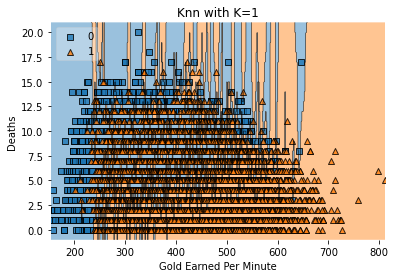

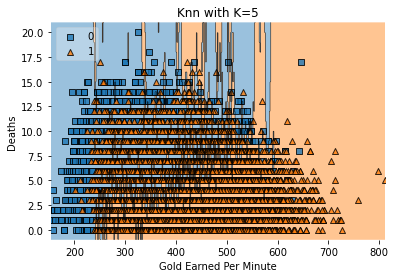

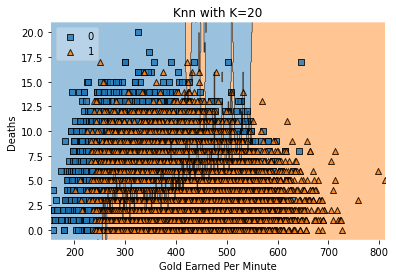

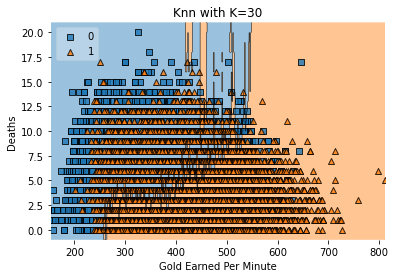

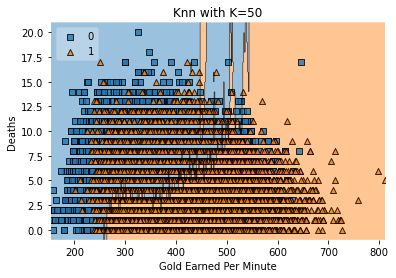

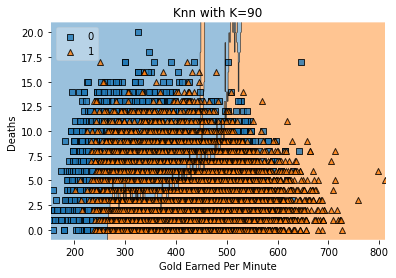

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions


predict_win = ['Gold_Earned_per_Minute', 'Deaths']
def knn_comparison(k):
    x = df_datasplit[predict_win].to_numpy()
    y = df_datasplit[target_variable].to_numpy()
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    
# Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)

# Adding axes annotations
    plt.xlabel('Gold Earned Per Minute')
    plt.ylabel('Deaths')
    plt.title('Knn with K='+ str(k))
    plt.show()
    
    
    
for i in [1,5,20,30,50,90]:
    knn_comparison(i)

### Adaboost

In [30]:
# Running Adaboost with Repeated Stratified K Folds


start_time = time.time()

params_ab = {'n_estimators': [20,30,50,70,80],'learning_rate': [.5,.7,1,1.25,1.75]}

ab = GridSearchCV(AdaBoostClassifier(random_state=1), params_ab)
ab.fit(X_train, y_train)
print(f'Best Scores: {ab.best_score_}')
print(f'Best Parameters: {ab.best_params_}')

# Predicting
y_pred_AB = ab.predict(X_test)

stop_time = time.time() - start_time
print(f'Run Time: {stop_time}')

Best Scores: 0.8863744028579736
Best Parameters: {'learning_rate': 0.7, 'n_estimators': 80}
Run Time: 95.1428689956665


In [31]:
# Results


r2_AB = r2_score(y_test,y_pred_AB) 
r2.append(r2_AB)

E5 = round(mean_absolute_percentage_error(y_test,y_pred_AB),4)
PCT_ME.append(E5)

Train_Score_AB = ab.score(X_train,y_train)*100
Train_score.append(Train_Score_AB)
print("Trainning Score is {}".format(Train_Score_AB))

Test_Score_AB = ab.score(X_test,y_test)*100
Test_score.append(Test_Score_AB)
print("Testing Score is {}".format(Test_Score_AB))

Trainning Score is 88.92689858428504
Testing Score is 88.71816459692697


## Analysis

In [32]:
# R2 Score and Setting vector of Regressors


Regr = ['Random Forest','Naive Bayes Classifier', 
        'Support Vector Machine','K-Nearest Neighbors', 'Adaboost']

r2_df= pd.DataFrame(r2, columns = ['r2 Scores'])

r2_df

,r2 Scores
0,0.604173
1,0.167079
2,0.594067
3,0.448369
4,0.548589


In [33]:
# Preparing Results


results_df_Train = pd.DataFrame(Train_score, columns = ['Training Scores'])
results_df_Test = pd.DataFrame(Test_score, columns = ['Test Scores'])

results_df = pd.concat([results_df_Test,results_df_Train], axis = 1)
results_df

,Test Scores,Training Scores
0,90.107346,99.994737
1,79.183330,77.785380
2,89.854767,90.342614
3,86.213429,100.000000
4,88.718165,88.926899


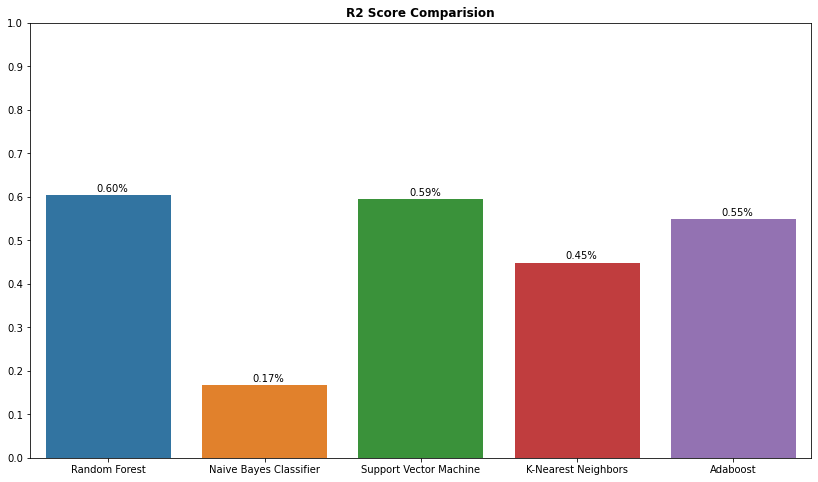

In [36]:
# Visulaizing the Results


plt.figure(figsize=(14,8))
ax = sns.barplot(x=Regr,y=r2)
plt.yticks(np.arange(0, 1.1, step=.1))
plt.title('R2 Score Comparision',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (x +0.325, y + height+0.0085))
plt.show()

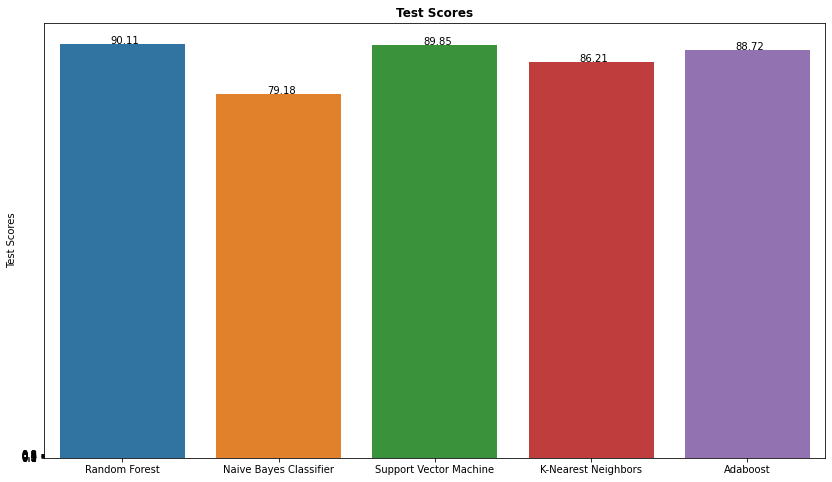

In [37]:
# Evaluating the Testing Errors


Test_Scores = np.array(results_df['Test Scores'])

plt.figure(figsize=(14,8))
ax = sns.barplot(x=Regr,y=results_df['Test Scores'])
plt.yticks(np.arange(0,1, step=0.1))
plt.title('Test Scores',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x +0.325, y + height+0.03))
plt.show()

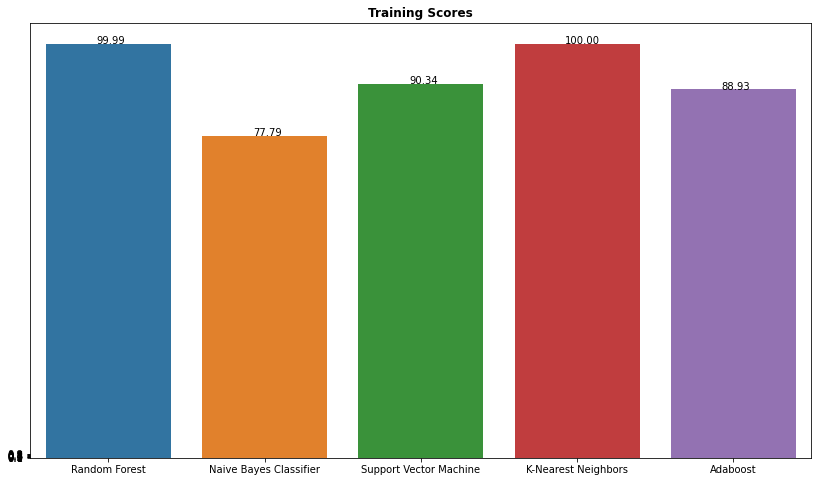

In [38]:
# Evaluating the Testing Errors


Test_Scores = np.array(results_df['Training Scores'])

plt.figure(figsize=(14,8))
ax = sns.barplot(x=Regr,y=Test_Scores)
plt.yticks(np.arange(0,1, step=0.1))
plt.title('Training Scores',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x +0.325, y + height+0.03))
plt.show()